There are totally 11 types of images with count of fingers from zero to 5 for each of left and right hand. 
The images are grayscale.  
Train and validation images  are 18K and test images are 3.6K.  
Image classification by building Neural Network models is checked for performance metrics. 
Performance metrics are F1 score for each class and overall accuracy .  




In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
## Fingers  dictionary 
names = {'0R' : 0 , '0L' : 1  , '1R' : 2 , '1L' : 3 , '2R' : 4  , '2L' : 5 , '3R' : 6, '3L' : 7 , '4R' : 8 , '4L' : 9 , '5R' : 10 , '5L' : 11 }

In [5]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    img_class = []
    for filename in os.listdir(folder):
        img_class.append(filename[-6:-4] )
        img = cv2.imread(os.path.join(folder,filename), 0)
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images, img_class

images , image_class = load_images_from_folder("../input/fingers/train")

In [6]:
type(images) , type(image_class)

(list, list)

In [7]:
images = np.array(images)
images.shape

(18000, 224, 224)

In [8]:
## convert the character class names to numeric values 
image_class_numeric = [names[i] for i in image_class]
image_class_numeric =  np.array(image_class_numeric)
pd.Series(image_class_numeric).value_counts()

8     1500
9     1500
0     1500
3     1500
5     1500
10    1500
7     1500
6     1500
11    1500
4     1500
2     1500
1     1500
dtype: int64

In [9]:
image_class_numeric = np.array(image_class_numeric)
image_class_numeric.shape

(18000,)

In [10]:
## Read in test images 
test_images , test_image_class = load_images_from_folder("../input/fingers/test")

In [11]:
type(test_images) , type(test_image_class)

(list, list)

In [12]:
x_test = np.array(test_images)
x_test.shape

(3600, 224, 224)

In [13]:
## convert the character class names to numeric values 
y_test = [names[i] for i in test_image_class]
y_test = np.array(y_test)
pd.Series(y_test).value_counts()

3     300
0     300
7     300
8     300
2     300
11    300
10    300
4     300
9     300
5     300
6     300
1     300
dtype: int64

In [14]:
## add single channel to the images 
images = images.reshape(images.shape[0] , 224, 224, 1)
print(images.shape)
##
x_test = x_test.reshape(x_test.shape[0] , 224, 224, 1)
print(x_test.shape)

(18000, 224, 224, 1)
(3600, 224, 224, 1)


In [16]:
## Using sklearn train_test_split 
x_train, x_val, y_train, y_val = train_test_split(images, image_class_numeric , stratify = image_class_numeric, test_size = 0.25 , random_state = 22)


print("train size :{}".format(x_train.shape))
print("y_train size :{}".format(y_train.shape))
##
print("val size :{}".format(x_val.shape))
print("y_val size :{}".format(y_val.shape))
##
print("test size :{}".format(x_test.shape))
print("y_test size :{}".format(y_test.shape))


train size :(13500, 224, 224, 1)
y_train size :(13500,)
val size :(4500, 224, 224, 1)
y_val size :(4500,)
test size :(3600, 224, 224, 1)
y_test size :(3600,)


In [17]:
pd.Series(y_train).value_counts()

4     1125
3     1125
5     1125
10    1125
11    1125
9     1125
2     1125
1     1125
6     1125
8     1125
0     1125
7     1125
dtype: int64

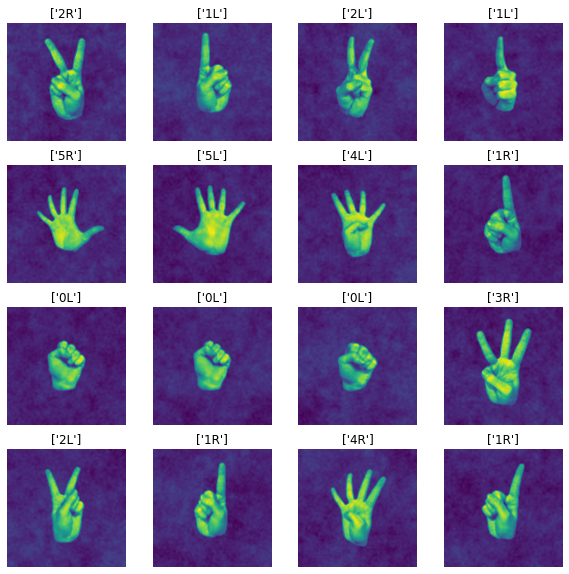

In [18]:
## visualize train set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)    
    plt.imshow(x_train[i])
    #
    label = y_train[i]
    name = [k for k, v in names.items() if v == label]
    plt.title(name)
    plt.axis("off")

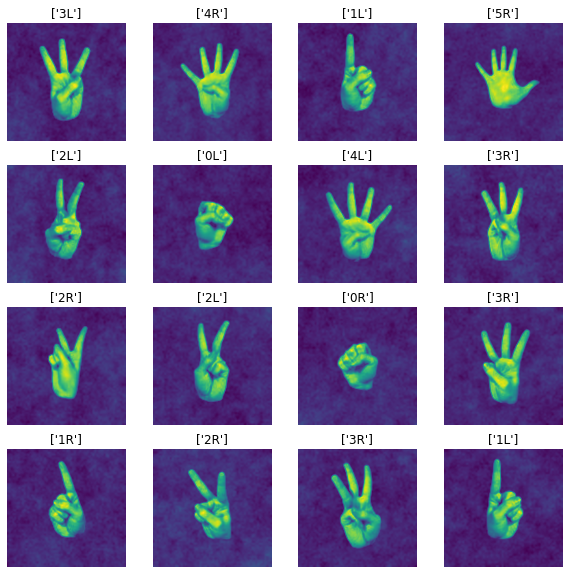

In [19]:
## visualize validation set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)    
    plt.imshow(x_val[i])
    #
    label = y_val[i]
    name = [k for k, v in names.items() if v == label]
    plt.title(name)
    plt.axis("off")

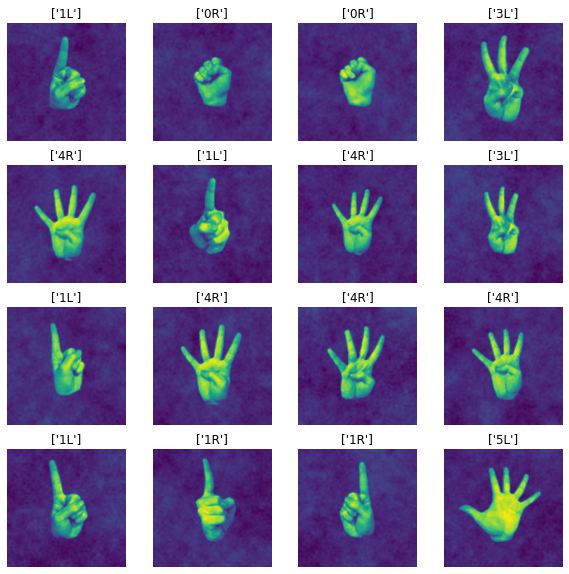

In [20]:
## visualize test set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)    
    plt.imshow(x_test[i])
    #
    label = y_test[i]
    name = [k for k, v in names.items() if v == label]
    plt.title(name)
    plt.axis("off")

2022-02-08 08:42:12.397627: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 677376000 exceeds 10% of free system memory.


CPU times: user 31.8 s, sys: 3.48 s, total: 35.2 s
Wall time: 42.6 s
422/422 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9998
Train image accuracy :0.9997777938842773
113/113 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9981
Test image accuracy :0.9980555772781372
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5017700   
_________________________________________________________________
dense_3 (Dense)              (None, 12)                1212      
Total params: 5,018,912
Trainable params: 5,018,912
Non-

2022-02-08 08:42:58.454529: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


              precision    recall  f1-score   support

          0R       1.00      1.00      1.00       300
          0L       1.00      1.00      1.00       300
          1R       1.00      1.00      1.00       300
          1L       1.00      1.00      1.00       300
          2R       0.98      1.00      0.99       300
          2L       1.00      1.00      1.00       300
          3R       1.00      0.98      0.99       300
          3L       1.00      1.00      1.00       300
          4R       1.00      1.00      1.00       300
          4L       1.00      1.00      1.00       300
          5R       1.00      1.00      1.00       300
          5L       1.00      1.00      1.00       300

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



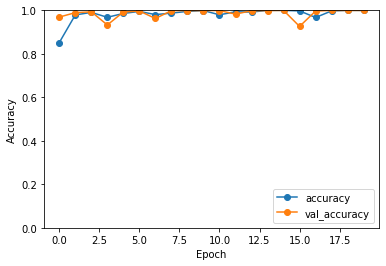

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(100, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=20, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('dense_100')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

In the second slice of train and validation images , the NN with dense layer of 100 neurons , gives the same performance i.e accuracy of 100%